# Object detection in the "wild"

A good application in quality management is classifying and counting objects.

In [28]:
# Import OpenCV
import cv2
# Since OpenCV is based on numpy:
import numpy as np
# Import pyplot (we will need this to plot with the notebook)
import matplotlib.pyplot as plt
# Helper function to provide plots in true colors in the notebook
def imshow(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)

## Aufgabenstellung

Diesmal geht es um Smarties:

![Smarties](Smarties0.png)

1. Findet und zählt die roten Smarties in den Bildern.

    - Dieses Beispiel ist gut in Anlehnung an die Sh2-Tafeln im Beispiel lösbar.

1. Challenge: zählt große und kleine Smarties (habe ich bisher selbst nicht gelöst...).

    - Hier könnte "HoughCircles" helfen.

1. Challenge 2: Zählt, wie viele Smarties jeweils weggenommen werden.

    - Für Veränderungen ist es hilfreich, Bilder zu subtrahieren.

Dokumentiert eure Lösungen wie gewohnt in einem Jupyter Notebook.


Text(0.5, 1.0, 'Red')

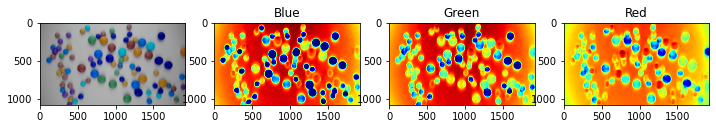

In [30]:
im = cv2.imread('smarties1.png')
plt.figure(figsize = (12,25))
plt.subplot(141)
plt.imshow(im)
plt.subplot(142)
plt.imshow(im[:,:,0], cmap = 'jet')
plt.title('Blue')
plt.subplot(143)
plt.imshow(im[:,:,1], cmap = 'jet')
plt.title('Green')
plt.subplot(144)
plt.imshow(im[:,:,2], cmap = 'jet')
plt.title('Red')

Apparently, the red isn't as strong as hoped for, especially the brown rust makes it difficult. However, we can remove parts of the brown by observing that green and red channels look almost the same for the rusty patches, so **Red - Green** may be helpful:

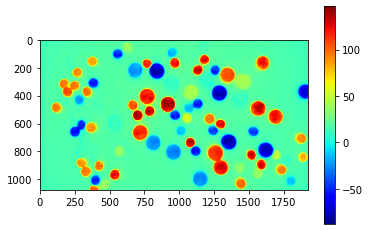

In [31]:
plt.imshow(im[:,:,2] - 0.9*im[:,:,1], cmap = 'jet')
plt.colorbar()

Indeed, the signal values appear to be between 60 and 90 in the subtracted image. Instead of BGR lets try HSV. HSV is an other representation of the rgb colour model. It describes colour by Hue, Saturation and brightness. Hue is what we are interested in. 

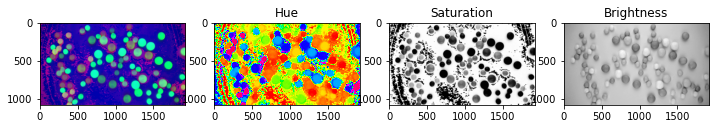

In [33]:
im = cv2.imread('smarties1.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.figure(figsize = (12,25))
plt.subplot(141)
plt.imshow(im)
plt.subplot(142)
plt.imshow(im[:,:,0], cmap = 'hsv')
plt.title('Hue')
plt.subplot(143)
plt.imshow(-im[:,:,1], cmap = 'gray')
plt.title('Saturation')
plt.subplot(144)
plt.imshow(im[:,:,2], cmap = 'gray')
plt.title('Brightness');


In [34]:
#filter for red-ish colors 
lower_color_range = np.array([0, 100, 100])
upper_color_range = np.array([10, 255, 255])
im = cv2.inRange(hsv, lower_color_range, upper_color_range)
plt.imshow(im)
plt.colorbar()

NameError: name 'hsv' is not defined

In [36]:
nsmarties=(17,16,16,14,14,14,14,14,) #for reference
lower_color_range = np.array([0, 100, 100])
upper_color_range = np.array([10, 255, 255])

for i in range(8):
    im = cv2.imread('smarties'+str(i)+'.png') 
    HSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    imBW = cv2.inRange(HSV, lower_color_range, upper_color_range)
    
    kernel = np.ones((7,7),np.uint8)
    # Twice erosion
    imBW = cv2.erode(imBW,kernel,iterations = 3)
    # Twice dilation to restore original size
    imBW = cv2.dilate(imBW,kernel,iterations = 4)  
    imBW = np.uint8(imBW)
    contours, hierarchy= cv2.findContours(imBW, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
#Count Smarties
    smartiescount=len(contours)
    print('\n'+ str(i) + '\nDetected ' + str(smartiescount) + ' smarties of ' + str(nsmarties[i]) )
    
    j = 0
    for c in contours:
        accuracy= 0.01 * cv2.arcLength(c, True)
        approx= cv2.approxPolyDP(c,accuracy,True)
        cv2.drawContours(im, [approx], 0, (255,0,0),5)
        cv2.putText(im, str(j), 
                (c[:,0][:,0].max()+20, c[:,0][:,1].min()+20), 
                cv2.FONT_HERSHEY_SIMPLEX,  
                   2, (255,0,0), 4, cv2.LINE_AA)
        j = j+1
        
    cv2.imwrite('DetectedSmarties'+str(i)+'.png', im)

#Challenge 2 count big and small smarties
#In this example only red Smarties were counted. 
#In the saturation image further up, one can see that the background is of a certain saturation. 
#A filters by this saturation, can be used to calculate the amount of smarties of a certain size.

#Count Big and Small Smarties

    bigsmarties=0
    for cnt in contours:
        # calculate object size
        area = cv2.contourArea(cnt)
        # print(area)
        if area > 6000:
            bigsmarties += 1
    
    smallsmarties=smartiescount-bigsmarties
            
    # print round objects count
    print("Big Smarties:", bigsmarties, "\nSmall Smarties:", smallsmarties)



0
Detected 17 smarties of 17
Big Smarties: 4 
Small Smarties: 13

1
Detected 16 smarties of 16
Big Smarties: 5 
Small Smarties: 11

2
Detected 16 smarties of 16
Big Smarties: 5 
Small Smarties: 11

3
Detected 14 smarties of 14
Big Smarties: 3 
Small Smarties: 11

4
Detected 14 smarties of 14
Big Smarties: 3 
Small Smarties: 11

5
Detected 14 smarties of 14
Big Smarties: 3 
Small Smarties: 11

6
Detected 14 smarties of 14
Big Smarties: 3 
Small Smarties: 11

7
Detected 14 smarties of 14
Big Smarties: 3 
Small Smarties: 11
